## Importing Libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [2]:
#!/bin/bash
!kaggle datasets download iqmansingh/data-preprocessing-dataset

Dataset URL: https://www.kaggle.com/datasets/iqmansingh/data-preprocessing-dataset
License(s): CC0-1.0
  0% 0.00/286 [00:00<?, ?B/s]
100% 286/286 [00:00<00:00, 707kB/s]


In [3]:
import zipfile
with zipfile.ZipFile('data-preprocessing-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('data')
    zip_ref.close()

In [4]:
df = pd.read_csv('data/Data.csv')

In [5]:
df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [6]:
df.tail()

,Country,Age,Salary,Purchased
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 452.0+ bytes


In [8]:
df.isnull().sum()

,0
Country,0
Age,1
Salary,1
Purchased,0


## Filling NA Values

In [11]:
df['Age'] = df[['Age']].fillna(df[['Age']].mean())
df['Salary'] = df[['Salary']].fillna(df[['Salary']].mean())
df.isnull().sum()

,0
Country,0
Age,0
Salary,0
Purchased,0


In [12]:
df.describe()

,Age,Salary
count,10.000000,10.000000
mean,38.777778,63777.777778
std,7.253777,11564.099406
min,27.000000,48000.000000
25%,35.500000,55000.000000
50%,38.388889,62388.888889
75%,43.000000,70750.000000
max,50.000000,83000.000000


## Encoding dataset

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Country'] = le.fit_transform(df['Country'])
df['Purchased'] = le.fit_transform(df['Purchased'])

In [14]:
df.head()

,Country,Age,Salary,Purchased
0,0,44.0,72000.000000,0
1,2,27.0,48000.000000,1
2,1,30.0,54000.000000,0
3,2,38.0,61000.000000,0
4,1,40.0,63777.777778,1


In [15]:
df.sample(10)

,Country,Age,Salary,Purchased
1,2,27.000000,48000.000000,1
6,2,38.777778,52000.000000,0
3,2,38.000000,61000.000000,0
5,0,35.000000,58000.000000,1
9,0,37.000000,67000.000000,1
2,1,30.000000,54000.000000,0
7,0,48.000000,79000.000000,1
4,1,40.000000,63777.777778,1
0,0,44.000000,72000.000000,0
8,1,50.000000,83000.000000,0


## Scaling dataset

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df[['Age', 'Salary']] = sc.fit_transform(df[['Age', 'Salary']])


In [17]:
df.head()

,Country,Age,Salary,Purchased
0,0,0.758874,7.494733e-01,0
1,2,-1.711504,-1.438178e+00,1
2,1,-1.275555,-8.912655e-01,0
3,2,-0.113024,-2.532004e-01,0
4,1,0.177609,6.632192e-16,1


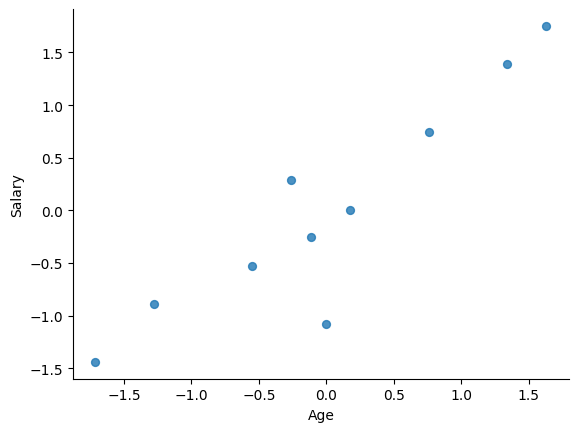

In [18]:
# @title Age vs Salary

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Age', y='Salary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

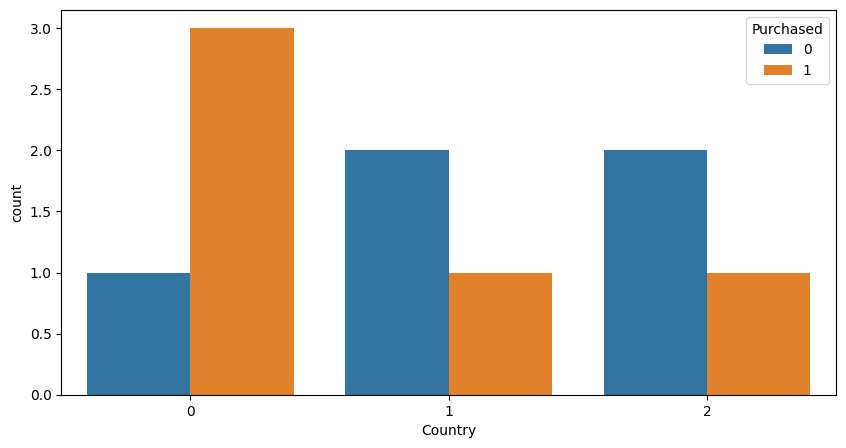

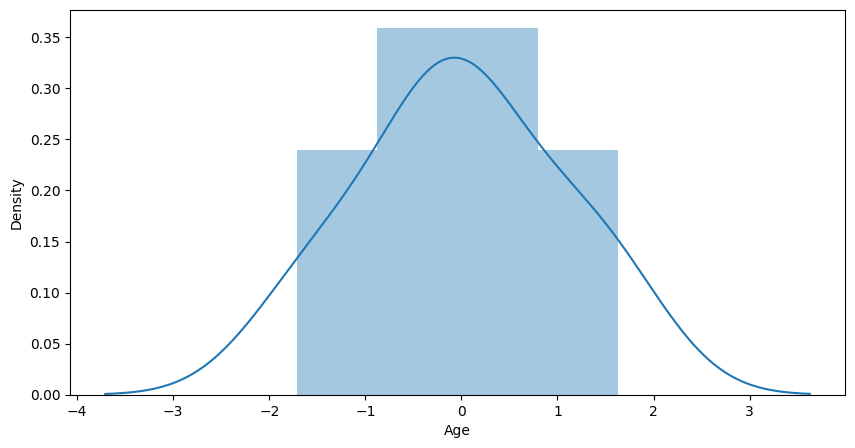

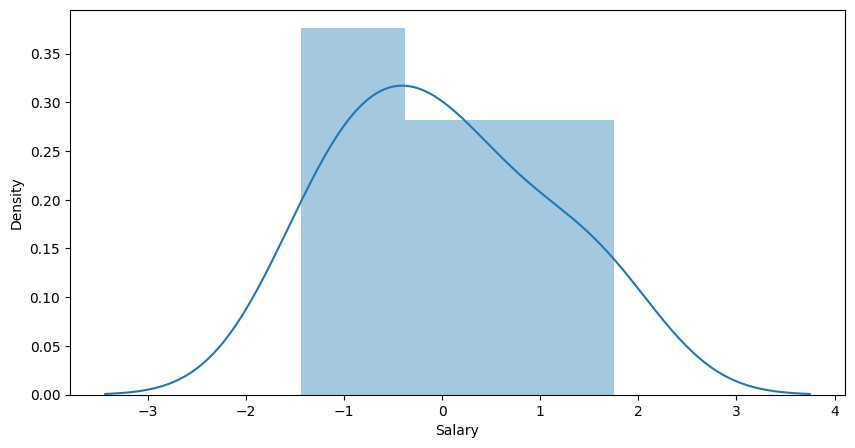

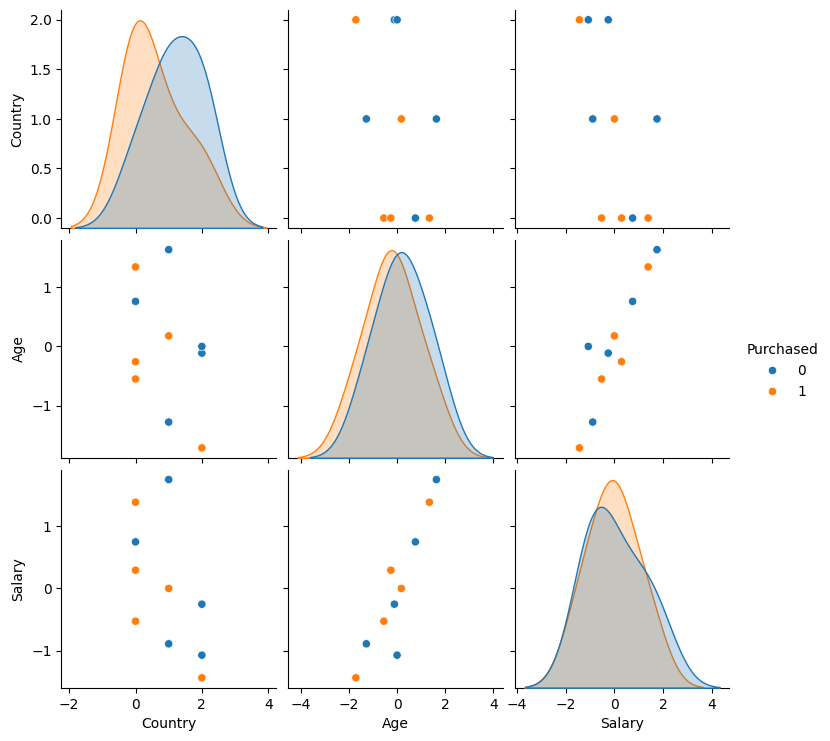

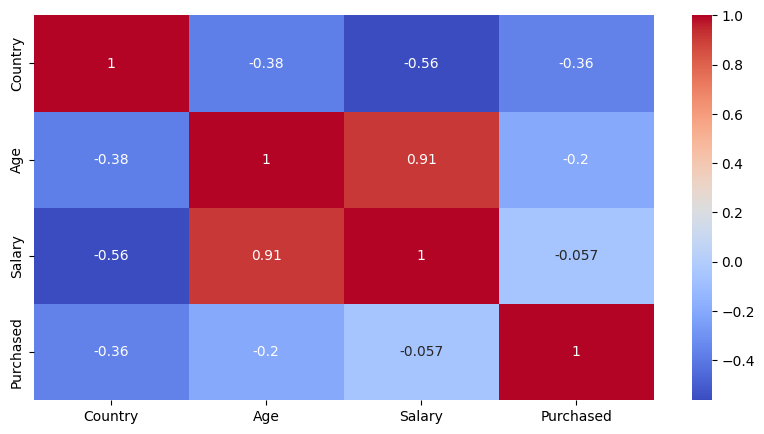

In [19]:
# Country vs Purchased
plt.figure(figsize=(10,5))
sns.countplot(x='Country', hue='Purchased', data=df)
plt.show()
#  Distribution of Age
plt.figure(figsize=(10,5))
sns.distplot(df['Age'])
plt.show()
#  Distribution of Salary
plt.figure(figsize=(10,5))
sns.distplot(df['Salary'])
plt.show()
# Pair Plot
sns.pairplot(df, hue='Purchased')
plt.show()
# Heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


## Train-Test split

In [20]:
from sklearn.model_selection import train_test_split
X = df.drop('Purchased', axis=1)
y = df['Purchased']


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
X_train

,Country,Age,Salary
5,0,-0.548973,-5.266569e-01
0,0,0.758874,7.494733e-01
7,0,1.340140,1.387538e+00
2,1,-1.275555,-8.912655e-01
9,0,-0.258340,2.937125e-01
4,1,0.177609,6.632192e-16
3,2,-0.113024,-2.532004e-01
6,2,0.000000,-1.073570e+00


In [23]:
X_test

,Country,Age,Salary
8,1,1.630773,1.752147
1,2,-1.711504,-1.438178


In [24]:
y_train

,Purchased
5,1
0,0
7,1
2,0
9,1
4,1
3,0
6,0


In [26]:
y_test

,Purchased
8,0
1,1
